# Basic Imports

In [1]:
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Evaluation Imports
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Configurations
isDemoMode = True

 ### Update Default number of DF columns

In [3]:
print(f"Default number of DF columns displayed {pd.get_option('display.max_columns')}")

# settings to display all columns
pd.set_option("display.max_columns", None)

Default number of DF columns displayed 20


# Load Test data from CSV

In [4]:
df = pd.read_csv ('../flatten_crypto_data.csv')
df

,high_24h,last_24h,unix_timestamp,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap
0,62971.54,62561.13,1635527368,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,50.683466,29.933036,51.410352,1.179682e+12,44.2449,1.313676e+12
1,62971.54,62580.05,1635527309,62571.40,60907.24,5111.938615,56425.0,62580.05,60608.95,62580.05,0.046548,62555.88,62577.47,62555.88,21000000.0,18858012.0,18858012.0,62530.948307,4.305221e+10,6.0179,-0.422853,2.137546,2.146984,50.578304,29.917416,51.320919,1.179209e+12,44.2040,1.313150e+12
2,62971.54,62591.17,1635527428,62582.19,60908.89,5115.569587,56425.0,62596.03,60608.95,62597.65,2.112533,62555.02,62597.64,62560.95,21000000.0,18858012.0,18858012.0,62551.924819,4.304739e+10,6.0643,-0.365020,2.383982,2.150485,50.771799,29.997052,51.453950,1.179605e+12,44.2421,1.313590e+12
3,62971.54,62590.43,1635527672,62572.06,60909.91,5117.061581,56425.0,62590.43,60608.95,62615.00,0.596406,62590.43,62590.43,62603.62,21000000.0,18858012.0,18858012.0,62591.537709,4.311295e+10,6.1673,-0.311393,2.375399,2.464668,50.828620,30.044297,51.488766,1.180352e+12,44.2517,1.314422e+12
4,62971.54,62600.43,1635527551,62587.09,60909.54,5117.193435,56425.0,62606.26,60608.95,62600.43,0.657752,62577.18,62600.43,62577.18,21000000.0,18858012.0,18858012.0,62584.316178,4.310036e+10,6.1706,-0.379612,2.422122,2.443523,50.807128,30.074340,51.475109,1.180216e+12,44.2650,1.314271e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246786,38786.95,38327.07,1651352348,38304.93,38539.95,534.789447,38160.4,38326.82,38599.30,38327.07,0.000650,38327.07,38327.07,38327.07,21000000.0,19026825.0,19026825.0,38334.504957,2.115848e+10,-24.4114,-0.363037,-0.606400,-3.693057,-16.314320,-12.909292,1.689268,7.293839e+11,42.0516,8.050246e+11
246787,38786.95,38332.23,1651352290,38314.66,38539.96,535.007039,38160.4,38335.17,38599.30,38332.23,0.000000,38332.23,38332.23,38332.23,21000000.0,19026825.0,19026825.0,38332.043361,2.114067e+10,-24.4769,-0.344114,-0.592877,-3.713096,-16.308426,-12.839252,1.692403,7.293371e+11,42.0489,8.049729e+11
246788,38786.95,38329.94,1651352410,38317.93,38539.93,534.564625,38160.4,38330.19,38599.30,38317.93,0.007191,38317.93,38317.93,38317.93,21000000.0,19026825.0,19026825.0,38337.264339,2.115928e+10,-24.4040,-0.345789,-0.598362,-3.683293,-16.296175,-12.917047,1.698228,7.294364e+11,42.0546,8.050826e+11
246789,38786.95,38344.79,1651352469,38321.67,38539.90,534.297570,38160.4,38344.79,38599.30,38344.79,0.000000,38344.79,38344.79,38344.79,21000000.0,19026825.0,19026825.0,38334.446382,2.115736e+10,-24.4076,-0.354289,-0.602308,-3.686438,-16.303936,-12.928782,1.698071,7.293828e+11,42.0515,8.050234e+11


# Print the number of Dataset observations.


In [5]:
len(df)

246791

# Plot Last minute Close price

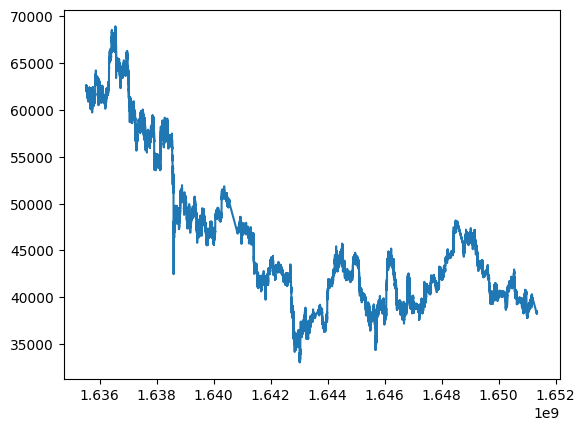

In [6]:
plt.plot(df['unix_timestamp'], df['close_1min'] )
plt.show()

# Plot Last minute open price


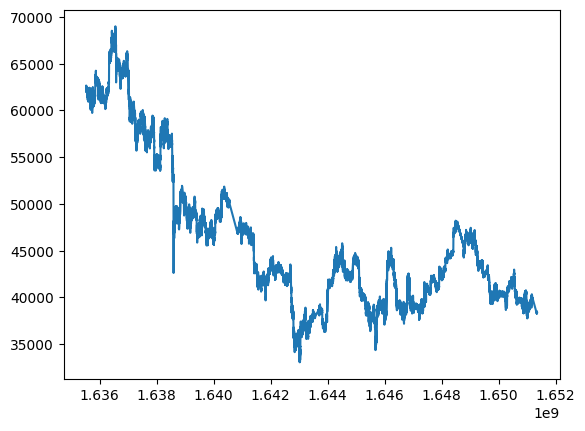

In [7]:
plt.plot(df['unix_timestamp'], df['open_1min'] )
plt.show()

# Bitcont Price Predicition Preperations

Gia na pragmatopoisoume provlepsi tis timis tou bitcoin tha xtrisimopoiisoume tin timi **`close_1min`** prokoimenou na
provlepsoume me tin timi me tin opoia tha klisi to BTC sto epomeno lepto.

Gia na ekpedeusoume kai na dokimasoume ta montela mas tha xorisoume to dataset mas se 2 yposinola
- train_set: to opoio tha periexei to 90% ton paratirisewn
- test_set: to opoio tha periexei to 10% ton paratirisewn.

In [8]:
df = df.tail(round(0.10 * len(df))) if isDemoMode else df
print(f"Test DF len {len(df)}")

cut_off = int(len(df) * 0.9)

training_data = list(df[0:cut_off]["close_1min"])
test_data = list(df[cut_off:]["close_1min"])

print(f"Training Data Length: {len(training_data)}")
print(f"Test Data Length: {len(test_data)}")

Test DF len 24679
Training Data Length: 22211
Test Data Length: 2468


# Display training and test Data.

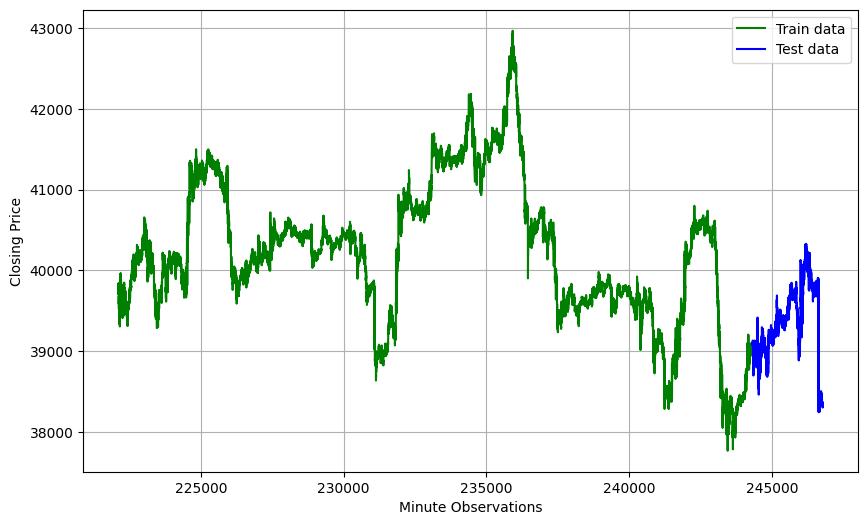

In [9]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df[0:cut_off]["close_1min"], 'green', label='Train data')
plt.plot(df[cut_off:]["close_1min"], 'blue', label='Test data')
plt.legend()

# Create ARIMA benchmark model

 Gia tin provlepsi tha dimiourgisoume ena ARIMA model taksis:
 - AR: 4
 - I: 1
 - MA: 0

To sigkekrimeno montelo tha xisimopoiithei gia na provlepsei ola ta testing data.
Meta apo kathe provlepsei tha enimeronoume to training_set prosthetontas kathe fora to actual price
prokoimenou na einai egkiro to montelo mas stin epomeni provlepsi.

In [10]:
model_prediction = []
n_test_observation = len(test_data)

for i in range(n_test_observation):
    
    print("---------------------------------")
    print(f'Predict {i} observation')
    model = ARIMA(training_data, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    # get the actual prediction value
    yhat = list(output)[0].item()

    # append prediction into list
    model_prediction.append(yhat)

    # update training data appending the actual bitcoin price.
    actual_btc_value = test_data[i]
    training_data.append(actual_btc_value)

    # print prediction output
    print('predicted = %f,   expected = %f' % (yhat, actual_btc_value), '%')
    print("---------------------------------")

---------------------------------
Predict 0 observation
predicted = 39040.451559,   expected = 39095.060000 %
---------------------------------
---------------------------------
Predict 1 observation
predicted = 39067.829045,   expected = 39074.100000 %
---------------------------------
---------------------------------
Predict 2 observation
predicted = 39072.890239,   expected = 39083.510000 %
---------------------------------
---------------------------------
Predict 3 observation
predicted = 39080.722158,   expected = 39105.560000 %
---------------------------------
---------------------------------
Predict 4 observation
predicted = 39094.351472,   expected = 39101.950000 %
---------------------------------
---------------------------------
Predict 5 observation
predicted = 39098.201882,   expected = 39108.820000 %
---------------------------------
---------------------------------
Predict 6 observation
predicted = 39104.439780,   expected = 39132.170000 %
--------------------------

In [11]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(test_data[:len(model_prediction)], model_prediction))
print('RNSE error = %.3f ' %rmse, '%')


RNSE error = 71.481  %


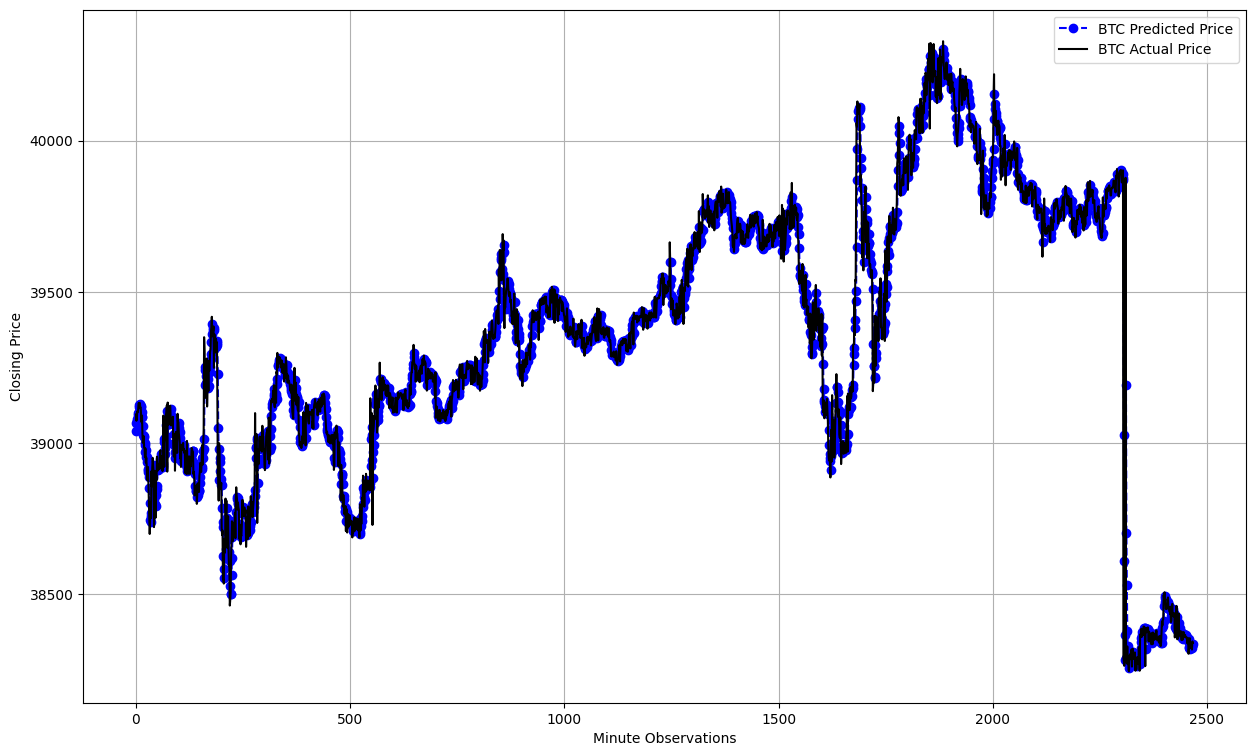

In [12]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[cut_off:]["unix_timestamp"]

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(model_prediction, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(test_data[:len(model_prediction)], 'black', label='BTC Actual Price')
plt.legend()



In [21]:
def display_training_curves(training, validation, title, subplot=None) :
    plt.figure(figsize=(15,9))
    if subplot is not None:
        ax = plt.subplot(subplot)
    else:
        ax = plt.subplot()
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model ' + title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['training', 'validation'])
    plt.show()
    return

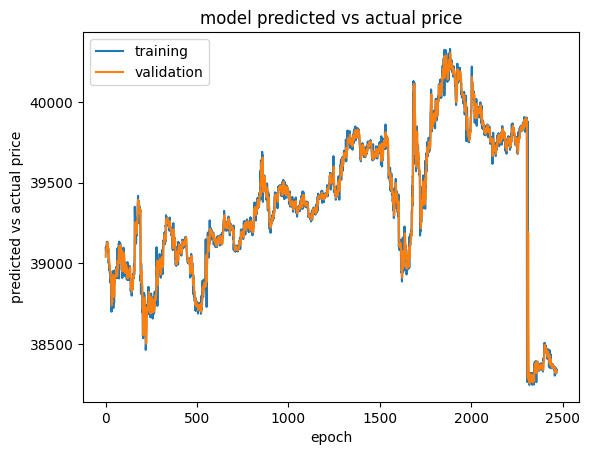

In [14]:
display_training_curves(test_data, model_prediction, 'predicted vs actual price')




# Predict price with ARIMA (1,1,0)
- AR: 1
- I: 1
- MA: 0

In [15]:
training_data = list(df[0:cut_off]["close_1min"])
test_data = list(df[cut_off:]["close_1min"])

print(f"Training Data Length: {len(training_data)}")
print(f"Test Data Length: {len(test_data)}")

Training Data Length: 22211
Test Data Length: 2468


In [16]:
model_prediction = []
n_test_observation = len(test_data)

for i in range(n_test_observation):

    print("---------------------------------")
    print(f'Predict {i} observation')
    model = ARIMA(training_data, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    # get the actual prediction value
    yhat = list(output)[0].item()

    # append prediction into list
    model_prediction.append(yhat)

    # update training data appending the actual bitcoin price.
    actual_btc_value = test_data[i]
    training_data.append(actual_btc_value)

    # print prediction output
    print('predicted = %f,   expected = %f' % (yhat, actual_btc_value), '%')
    print("---------------------------------")

---------------------------------
Predict 0 observation
predicted = 39043.014548,   expected = 39095.060000 %
---------------------------------
---------------------------------
Predict 1 observation
predicted = 39087.025932,   expected = 39074.100000 %
---------------------------------
---------------------------------
Predict 2 observation
predicted = 39082.122689,   expected = 39083.510000 %
---------------------------------
---------------------------------
Predict 3 observation
predicted = 39079.908206,   expected = 39105.560000 %
---------------------------------
---------------------------------
Predict 4 observation
predicted = 39097.120186,   expected = 39101.950000 %
---------------------------------
---------------------------------
Predict 5 observation
predicted = 39103.331750,   expected = 39108.820000 %
---------------------------------
---------------------------------
Predict 6 observation
predicted = 39106.190463,   expected = 39132.170000 %
--------------------------

In [17]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(test_data[:len(model_prediction)], model_prediction))
print('RNSE error = %.3f ' %rmse, '%')

RNSE error = 71.559  %


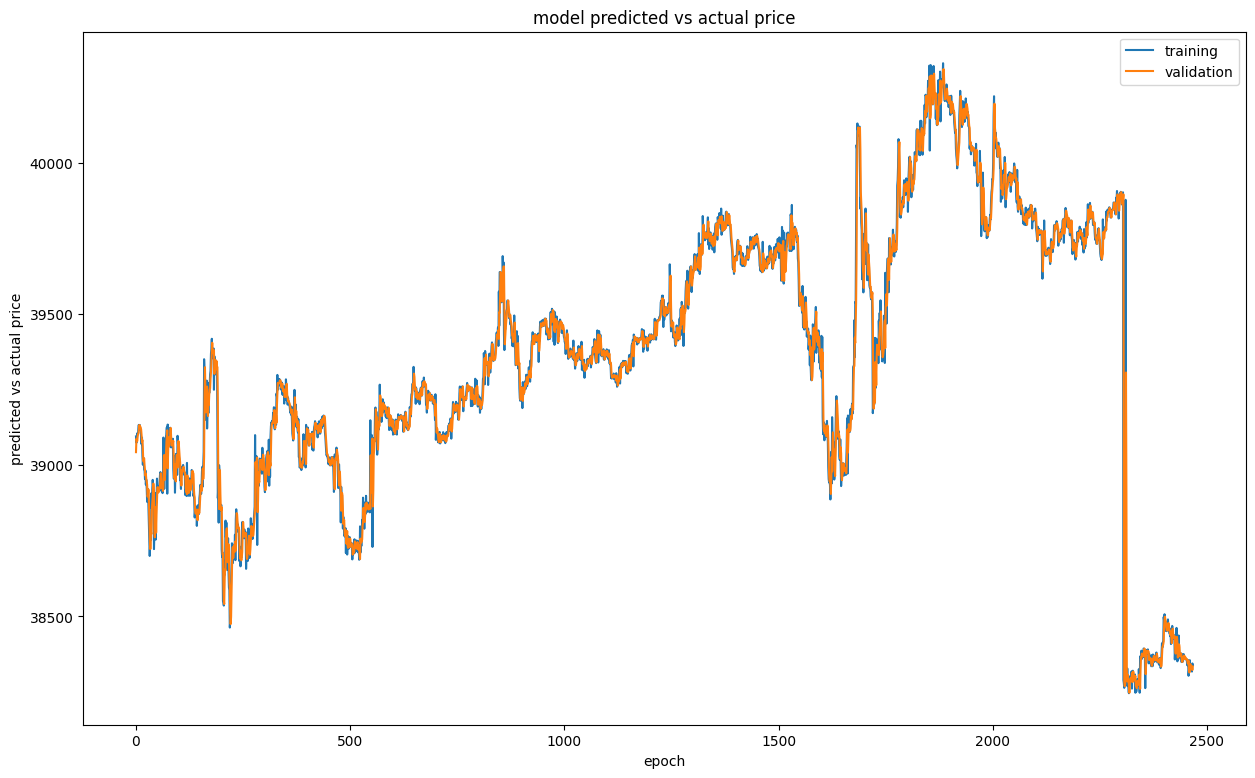

In [22]:
display_training_curves(test_data, model_prediction, 'predicted vs actual price')